In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [3]:
# Number of episodes
episodes = 10000

# Linear improvement from a minimum reward to a maximum reward
min_reward = -100
max_reward = 1000

# Simulating a scenario where the improvement is not linear but has some exponential characteristics
base_trend = np.logspace(np.log10(-min_reward + 10), np.log10(max_reward), episodes, base=10) - 10

# Add random noise to simulate variations in the rewards, but reduce the variance over time
noise_variance = np.linspace(100, 20, episodes)
noise = np.random.normal(0, noise_variance)

# Final rewards list
rewards_list = base_trend + noise

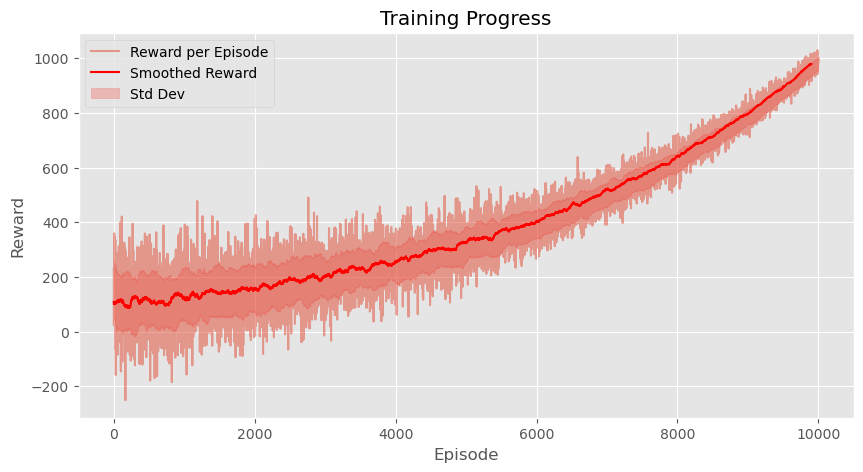

In [4]:
# Calculate the moving average
window_size = 100  # Size of the window for the moving average
smoothed_rewards = np.convolve(rewards_list, np.ones(window_size)/window_size, mode='valid')

# Calculate rolling standard deviation for the rewards
rolling_std = np.array([np.std(rewards_list[i-window_size+1:i+1]) for i in range(window_size-1, episodes)])

# Calculate the modified moving average and standard deviation with a growing window
smoothed_rewards_modified = np.array([np.mean(rewards_list[max(0, i-window_size+1):i+1]) for i in range(episodes)])
rolling_std_modified = np.array([np.std(rewards_list[max(0, i-window_size+1):i+1]) for i in range(episodes)])

# Plot both the original rewards and the smoothed rewards
plt.figure(figsize=(10, 5))
plt.plot(rewards_list, label='Reward per Episode', alpha=0.5)  # Original rewards (semi-transparent)
plt.plot(smoothed_rewards, label='Smoothed Reward', color='red')  # Smoothed rewards

# Shade the area for the standard deviation
plt.fill_between(range(episodes), smoothed_rewards_modified-rolling_std_modified, smoothed_rewards_modified+rolling_std_modified, color='red', alpha=0.2, label='Std Dev')

plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Training Progress')
plt.legend()
plt.show()

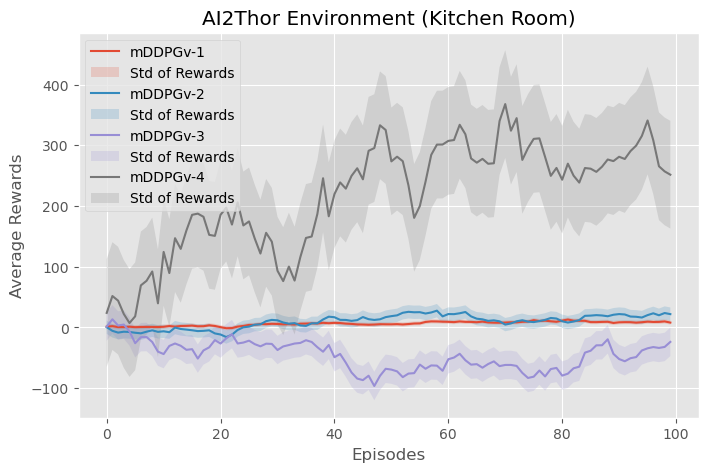

In [5]:
# Setting a seed for reproducibility
np.random.seed(10)

# Assuming 'x' is your independent variable
x = np.arange(0, 100)

# Creating sample data: 'ys' will be a list of arrays, each with a different standard deviation
ys = [np.random.normal(loc=0, scale=np.sqrt(n), size=100).cumsum() for n in [1, 10, 100, 1000]]

# Plotting each line with a confidence interval
plt.figure(figsize=(8,5))

for i, y in enumerate(ys):
    mean = np.mean(y)
    std = np.std(y)
    
    # Plot the mean line
    plt.plot(x, y, label=f'mDDPGv-{(i+1)}')
    
    # Shade the confidence interval
    plt.fill_between(x, y-std, y+std, alpha=0.2, label=f'Std of Rewards')
    
# Enhance the plot with title, labels, and a grid
plt.title('AI2Thor Environment (Kitchen Room)')
plt.xlabel('Episodes')
plt.ylabel('Average Rewards')
plt.grid(True)

# Show the legend
plt.legend()

# Show the plot
plt.show()

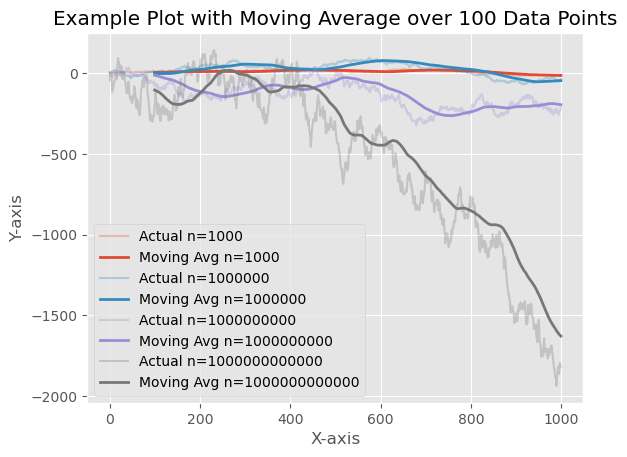

In [6]:
# Setting a seed for reproducibility
np.random.seed(10)

# Assuming 'x' is your independent variable
x = np.arange(0, 1000)  # Adjusted to have 1000 data points

# Creating sample data with increasing variability
ys = [np.random.normal(loc=0, scale=np.sqrt(n), size=1000).cumsum() for n in [1, 10, 100, 1000]]

# Define window size for the moving average
window_size = 100

# Plotting each line with the moving average and actual scores
for i, y in enumerate(ys):
    # Convert the data to a pandas Series to use the rolling function
    y_series = pd.Series(y)
    
    # Calculate the rolling mean
    rolling_mean = y_series.rolling(window=window_size).mean()
    
    # Get the next color in the color cycle
    next_color = plt.gca()._get_lines.prop_cycler.__next__()['color']
    
    # Plot the actual scores as a faint line
    plt.plot(x, y, label=f'Actual n={1000**(i+1)}', color=next_color, alpha=0.3)
    
    # Plot the rolling mean line with the same color
    plt.plot(x, rolling_mean, label=f'Moving Avg n={1000**(i+1)}', color=next_color, linewidth=2)

# Enhance the plot with title, labels, and a grid
plt.title('Example Plot with Moving Average over 100 Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)

# Show the legend
plt.legend()

# Show the plot
plt.show()

---

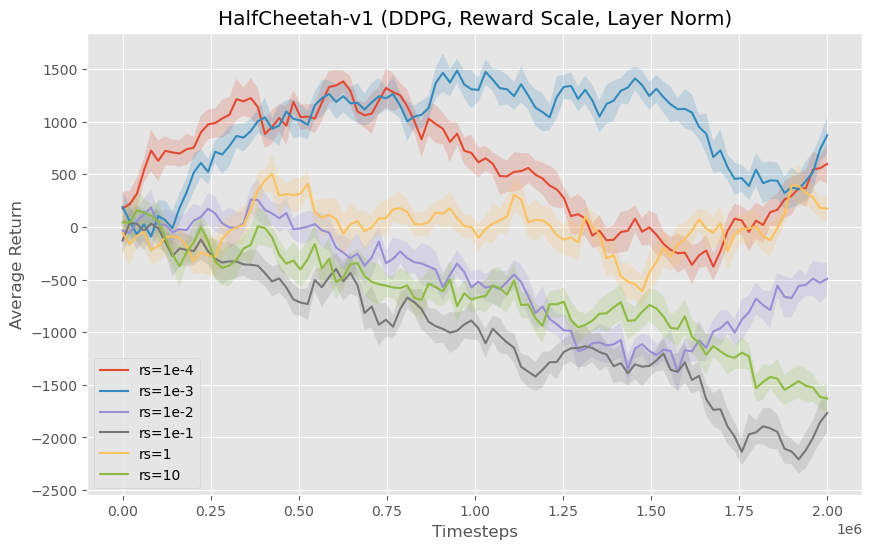

In [7]:
# Example data: Simulating different reward scale runs with mean and standard deviation
timesteps = np.linspace(0, 2e6, 100)  # Example timesteps from 0 to 2 million
np.random.seed(0)  # For reproducible results

mean_returns = {
    'rs=1e-4': np.random.normal(loc=0.0, scale=100.0, size=timesteps.shape[0]).cumsum(),
    'rs=1e-3': np.random.normal(loc=0.5, scale=100.0, size=timesteps.shape[0]).cumsum(),
    'rs=1e-2': np.random.normal(loc=1.0, scale=100.0, size=timesteps.shape[0]).cumsum(),
    'rs=1e-1': np.random.normal(loc=2.0, scale=100.0, size=timesteps.shape[0]).cumsum(),
    'rs=1': np.random.normal(loc=3.0, scale=100.0, size=timesteps.shape[0]).cumsum(),
    'rs=10': np.random.normal(loc=4.0, scale=100.0, size=timesteps.shape[0]).cumsum()
}

std_deviation = {
    'rs=1e-4': np.random.uniform(low=100.0, high=200.0, size=timesteps.shape[0]),
    'rs=1e-3': np.random.uniform(low=100.0, high=200.0, size=timesteps.shape[0]),
    'rs=1e-2': np.random.uniform(low=100.0, high=200.0, size=timesteps.shape[0]),
    'rs=1e-1': np.random.uniform(low=100.0, high=200.0, size=timesteps.shape[0]),
    'rs=1': np.random.uniform(low=100.0, high=200.0, size=timesteps.shape[0]),
    'rs=10': np.random.uniform(low=100.0, high=200.0, size=timesteps.shape[0])
}

plt.figure(figsize=(10, 6))

# Plot each curve with its mean and standard deviation
for rs, returns in mean_returns.items():
    plt.plot(timesteps, returns, label=rs)
    plt.fill_between(timesteps, returns - std_deviation[rs], returns + std_deviation[rs], alpha=0.2)

plt.title("HalfCheetah-v1 (DDPG, Reward Scale, Layer Norm)")
plt.xlabel("Timesteps")
plt.ylabel("Average Return")
plt.legend()
plt.grid(True)
plt.show()

---

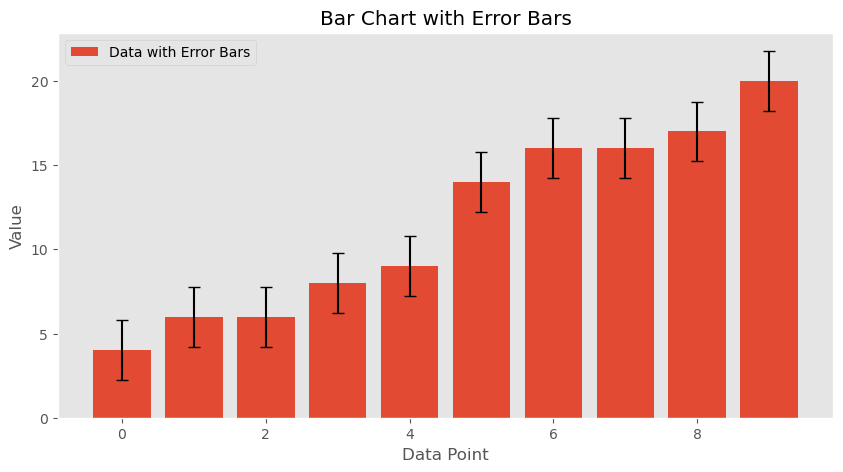

In [8]:
# Define data
data = [4, 6, 6, 8, 9, 14, 16, 16, 17, 20]

# Calculate standard error
std_error = np.std(data, ddof=1) / np.sqrt(len(data))

# Define x and y coordinates
x = np.arange(len(data))
y = data

# Create bar chart with error bars
plt.figure(figsize=(10, 5)) # Optional: specify figure size
plt.bar(x, y, yerr=std_error, capsize=4, label='Data with Error Bars')
plt.title('Bar Chart with Error Bars')
plt.xlabel('Data Point') # Optional: Add X-axis label
plt.ylabel('Value') # Optional: Add Y-axis label
plt.legend() # Show legend
plt.grid(False)
plt.show()

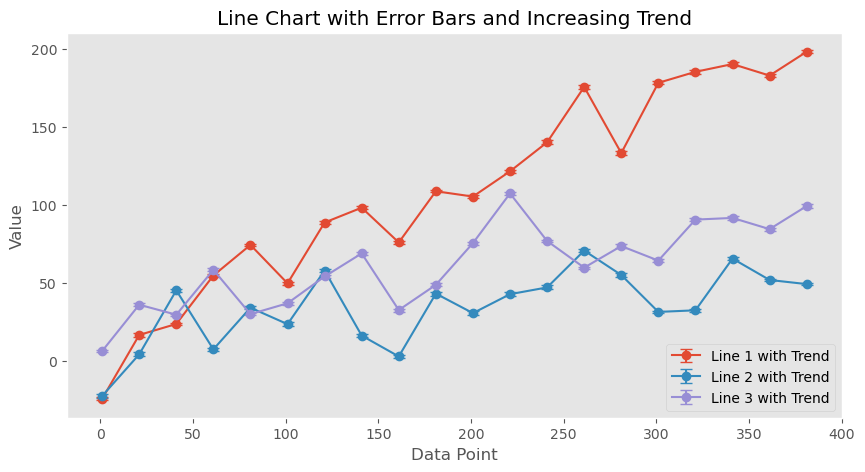

In [9]:
# Sample data
x = np.arange(1, 400)  # X-axis values, common for all lines
y1 = np.random.normal(10, 2, len(x))  # First set of Y-values
y2 = np.random.normal(15, 2, len(x))  # Second set of Y-values
y3 = np.random.normal(20, 2, len(x))  # Third set of Y-values

# Sample standard errors for each set of Y-values
std_error1 = np.random.normal(1, 0.2, len(x))
std_error2 = np.random.normal(1, 0.2, len(x))
std_error3 = np.random.normal(1, 0.2, len(x))

# Adjusting the y values to incorporate a slight increasing trend
trend_strength1 = 0.5  # Defines how strong the increasing trend is
trend_strength2 = 0.1  # Defines how strong the increasing trend is
trend_strength3 = 0.2  # Defines how strong the increasing trend is

# Generating the trends
trend1 = np.linspace(0, trend_strength1 * len(x), len(x))
trend2 = np.linspace(0, trend_strength2 * len(x), len(x))
trend3 = np.linspace(0, trend_strength3 * len(x), len(x))

# Generating noisy trends
noise_strength = 15
noisy_trend1 = trend1 + np.random.normal(0, noise_strength, len(x))
noisy_trend2 = trend2 + np.random.normal(0, noise_strength, len(x))
noisy_trend3 = trend3 + np.random.normal(0, noise_strength, len(x))

# New y values with trends
y1_trend = y1 + noisy_trend1
y2_trend = y2 + noisy_trend2
y3_trend = y3 + noisy_trend3

split_point = 20

# Plotting with the updated y values
plt.figure(figsize=(10, 5))
plt.errorbar(x[::split_point], y1_trend[::split_point], yerr=std_error1[::split_point], fmt='-o', capsize=4, label='Line 1 with Trend')
plt.errorbar(x[::split_point], y2_trend[::split_point], yerr=std_error2[::split_point], fmt='-o', capsize=4, label='Line 2 with Trend')
plt.errorbar(x[::split_point], y3_trend[::split_point], yerr=std_error3[::split_point], fmt='-o', capsize=4, label='Line 3 with Trend')

plt.title('Line Chart with Error Bars and Increasing Trend')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()

---

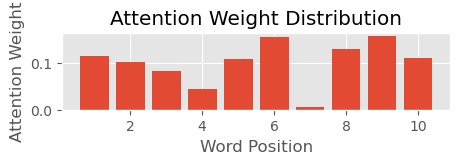

In [10]:
# Example attention weights for one sequence in a batch
# For demonstration, let's create a random distribution
attention_weights = np.random.rand(10)  # Sequence length of 10

# Normalize attention weights to sum to 1
attention_weights /= attention_weights.sum()

# Plotting
plt.figure(figsize=(5, 1))
plt.bar(range(1, len(attention_weights)+1), attention_weights)
plt.xlabel('Word Position')
plt.ylabel('Attention Weight')
plt.title('Attention Weight Distribution')
plt.show()

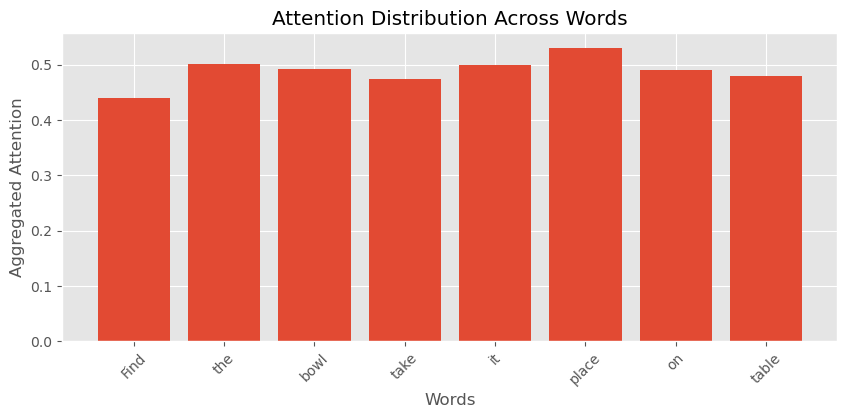

In [11]:
# Assuming attention_weights is a numpy array with shape (1, 640)
# Simulate attention_weights for demonstration
# attention_weights shape is the same as the text_features (1, 640)
# Simulate attention weights (1 is batch size, 640 is 64-dimentional features from LSTM (hidden_dim) for each word, word length is 10)
attention_weights = np.random.rand(1, 640)

# Aggregate the attention weights for each of the 10 words
# Each word is represented by 64-dimensional features
attention_scores = [np.mean(attention_weights[:, i*64:(i+1)*64]) for i in range(10)]

# Define the words in the sentence for labeling
words = ["Find", "the", "bowl", "take", "it", "place", "it", "on", "the", "table"]

# Plotting the attention distribution across the ten words
plt.figure(figsize=(10, 4))
plt.bar(words, attention_scores)
plt.xlabel('Words')
plt.ylabel('Aggregated Attention')
plt.title('Attention Distribution Across Words')
plt.xticks(rotation=45)
plt.show()

# more complete explanation: https://chat.openai.com/c/3faffdb2-8abe-4453-b501-357d27fa2c7a

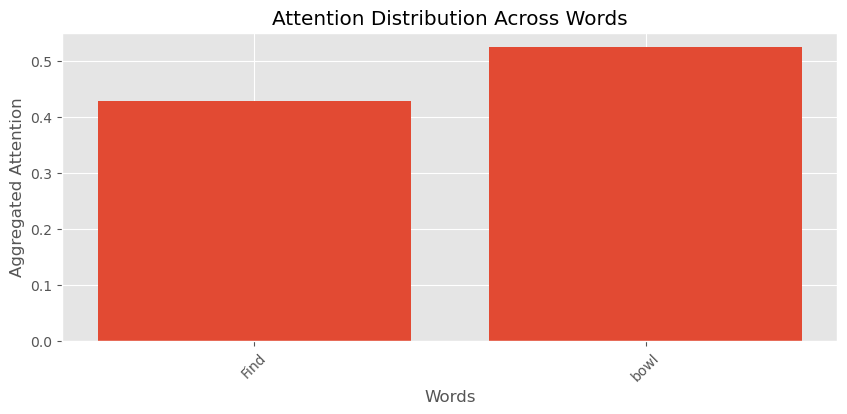

In [15]:
# Assuming attention_weights is a numpy array with shape (1, 640)
# Simulate attention_weights for demonstration
# attention_weights shape is the same as the text_features (1, 640)
# Simulate attention weights (1 is batch size, 640 is 64-dimentional features from LSTM (hidden_dim) for each word, word length is 10)
attention_weights = np.random.rand(1, 128)

# Aggregate the attention weights for each of the 10 words
# Each word is represented by 64-dimensional features
attention_scores = [np.mean(attention_weights[:, i*64:(i+1)*64]) for i in range(2)]

# Define the words in the sentence for labeling
words = ["Find", "bowl"]

# Plotting the attention distribution across the ten words
plt.figure(figsize=(10, 4))
plt.bar(words, attention_scores)
plt.xlabel('Words')
plt.ylabel('Aggregated Attention')
plt.title('Attention Distribution Across Words')
plt.xticks(rotation=45)
plt.show()

# more complete explanation: https://chat.openai.com/c/3faffdb2-8abe-4453-b501-357d27fa2c7a

#### Not relevant plot for our multimodal attention mechanism but nice plot

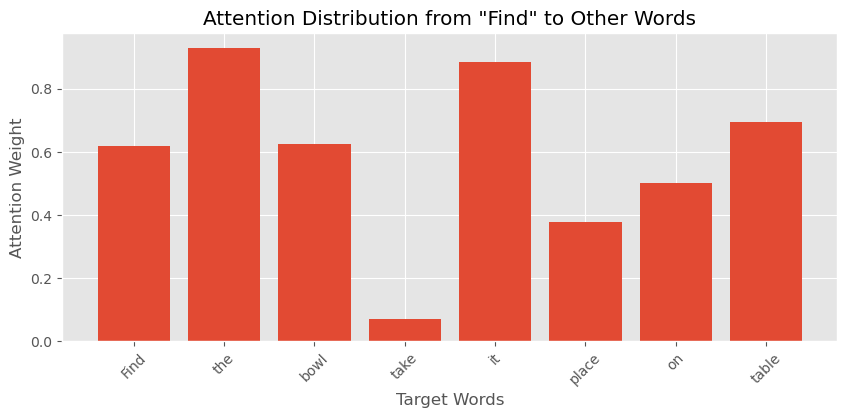

In [12]:
# Assuming attention_weights is a numpy array with shape (1, 10, 10) from your model
# Here, using dummy attention weights for demonstration
attention_weights = np.random.rand(1, 10, 10)
# Normally, you'd normalize these weights. Assuming they're already normalized for this example.

# Extracting attention distribution for the first word "Find"
# attention_weights[0, source_word_index, :] gives the distribution
source_word_index = 0  # Index for "Find"
attention_distribution = attention_weights[0, source_word_index, :]

# Define the words in the sentence for labeling
words = ["Find", "the", "bowl", "take", "it", "place", "it", "on", "the", "table"]

# Plotting the attention distribution as a bar plot
plt.figure(figsize=(10, 4))
plt.bar(words, attention_distribution)
plt.xlabel('Target Words')
plt.ylabel('Attention Weight')
plt.title(f'Attention Distribution from "{words[source_word_index]}" to Other Words')
plt.xticks(rotation=45)
plt.show()

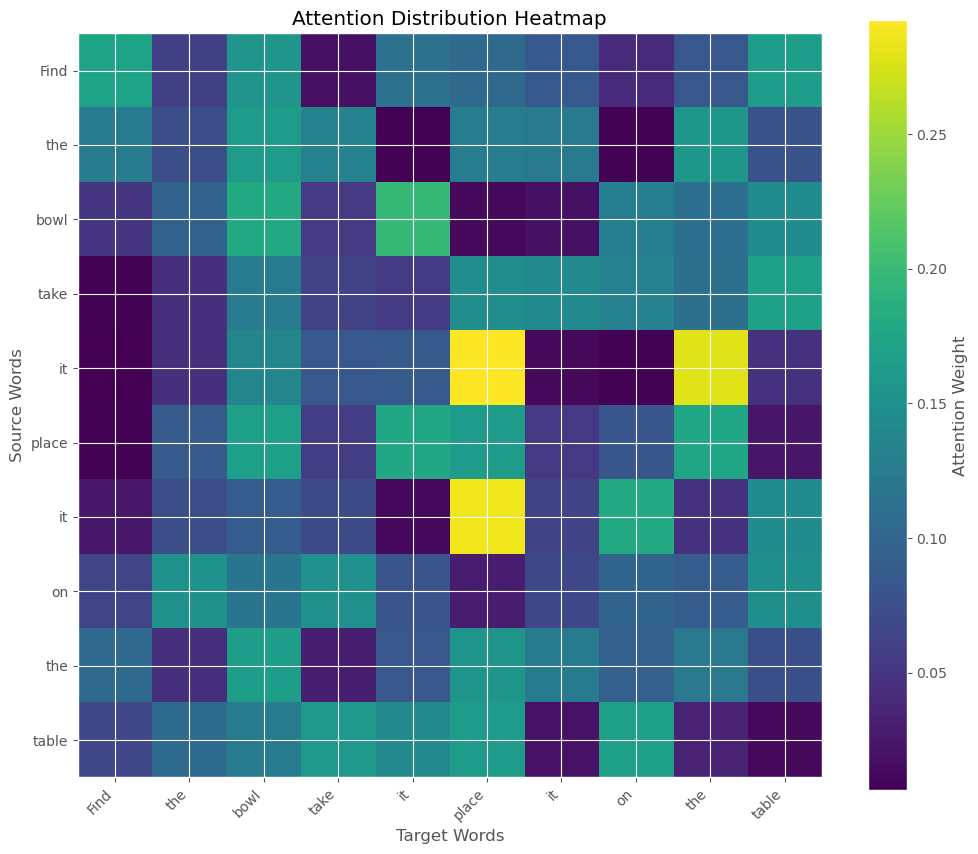

In [13]:
# Example attention weights, here replaced with dummy data for demonstration
# In practice, this would come from your model's forward pass
attention_weights = np.random.rand(1, 10, 10)
attention_weights /= attention_weights.sum(axis=2, keepdims=True)  # Normalize

# Select the attention matrix for the first (and only) batch
attention_matrix = attention_weights[0]

# Define the words in the sentence for labeling
words = ["Find", "the", "bowl", "take", "it", "place", "it", "on", "the", "table"]

# Plotting the attention matrix as a heatmap
plt.figure(figsize=(12, 10))
plt.imshow(attention_matrix, cmap='viridis')
plt.colorbar(label='Attention Weight')
plt.xticks(np.arange(len(words)), words, rotation=45, ha='right')
plt.yticks(np.arange(len(words)), words)
plt.title('Attention Distribution Heatmap')
plt.xlabel('Target Words')
plt.ylabel('Source Words')
plt.show()

---

In [ ]:
import time
import itertools
import tkinter as tk
import ai2thor.controller

In [ ]:
# Initialize Tkinter
root = tk.Tk()
root.title("AI2-THOR Action Display")

# Styling parameters
font_style = ('Helvetica', 14, 'bold')
bg_color = '#333333'
fg_color = '#FFFFFF'

# Variable to display actions
action_display_var = tk.StringVar()
action_display_var.set("Action: None")

# Create a label to display the action, and apply styling
action_display = tk.Label(root, textvariable=action_display_var, font=font_style, bg=bg_color, fg=fg_color, padx=10, pady=10)
action_display.pack(padx=20, pady=20)

# List of actions
actions = ['MoveAhead', 'RotateRight', 'RotateLeft', 'MoveBack']
actions_iter = itertools.cycle(actions)  # Create an iterator that cycles through the actions

def update_action_display():
    # Get the next action from the iterator
    action = next(actions_iter)
    # Update the displayed action
    action_display_var.set(f"Action: {action}")
    # Schedule the next update after 1000ms (1 second)
    root.after(1000, update_action_display)

# Start the first action update
root.after(0, update_action_display)

# Run the Tkinter loop
root.mainloop()

---